# Threshold simulation for CSS codes

In [1]:
# import
import matplotlib.pyplot as plt
import numpy as np
import json
import scipy # mmread

In [2]:
#plt.rcParams.update({"text.usetex": True})
#plt.rcParams.update({"text.usetex": False})

## Example: Steane Codes [[7,1,3]]

In [39]:
# parity check matrices of Steane codes saved in Matrix Market format
print('Gx')
Gx=scipy.io.mmread('result/n7k1d3-x3z3dx3dz3-0Gx.mm')
print(Gx.todense())
print('Gz')
Gz=scipy.io.mmread('result/n7k1d3-x3z3dx3dz3-0Gz.mm')
print(Gz.todense())

Gx
[[1 1 0 1 0 0 1]
 [1 1 1 0 1 0 0]
 [1 0 1 0 0 1 1]]
Gz
[[0 1 0 0 1 1 1]
 [1 1 0 1 0 0 1]
 [0 1 1 1 0 1 0]]


In [40]:
#sample data structure

#data = json.load(open('result/steane.json'))
data = json.load(open('result/n7k1d3-x3z3dx3dz3-0.json'))
data['data_map']
data

{'data_map': [[0.011215665478461513, 0.002467],
  [0.013458798574153816, 0.003512],
  [0.016150558288984578, 0.005086],
  [0.019380669946781493, 0.007227],
  [0.023256803936137792, 0.010181],
  [0.02790816472336535, 0.01451],
  [0.03348979766803842, 0.020104],
  [0.0401877572016461, 0.028158],
  [0.04822530864197532, 0.038755],
  [0.057870370370370385, 0.053545],
  [0.06944444444444446, 0.072956],
  [0.08333333333333334, 0.098261],
  [0.1, 0.130736]],
 'e_try': 1000000,
 'note': 'n7k1d3-x3z3dx3dz3-0',
 'num_cores': 16,
 'num_data': 13,
 'title': '../data/CSS-Codes/run2/n7k1d3-x3z3dx3dz3-0'}

In [4]:
#extract (x,y) data for plotting
def data2plot(data_columns):
    p_qubit=[]
    p_block=[]
    for pair in data_columns:
        p_qubit.append(pair[0])
        p_block.append(pair[1])
    return p_qubit,p_block
p_qubit,p_block = data2plot(data['data_map'])

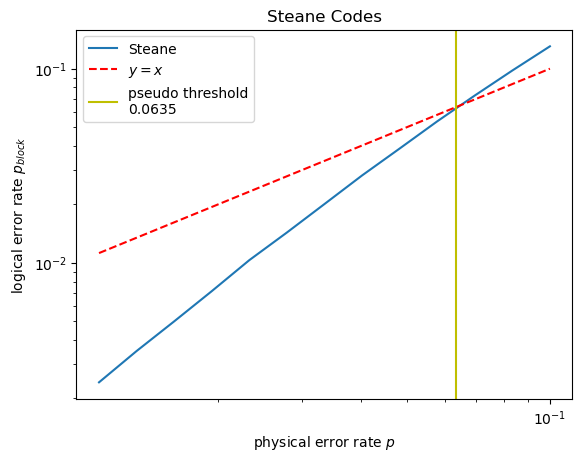

In [67]:
plt.title('Steane Codes')
plt.yscale('log'),plt.xscale('log')

data = json.load(open('result/steane.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='Steane')

h = np.array(p_qubit)
# red dashes, blue squares and green triangles
plt.plot(h, h, 'r--',label='$y=x$')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()
plt.legend()

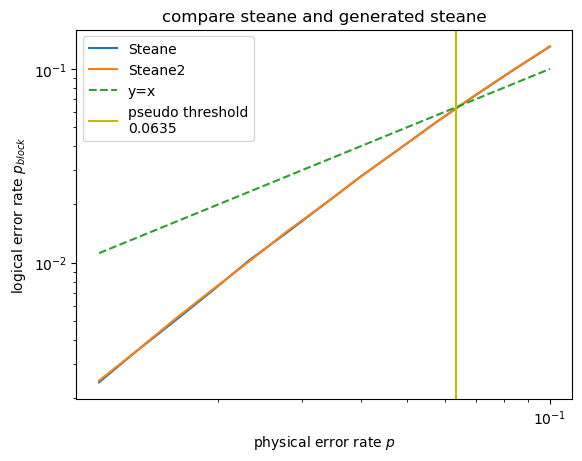

In [42]:
# Figure 1: compare steane and generated steane
plt.yscale('log'),plt.xscale('log')

data = json.load(open('result/steane.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='Steane')

data = json.load(open('result/n7k1d3-x3z3dx3dz3-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='Steane2')

h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')


p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.title('compare steane and generated steane')
plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

It looks like the two steane codes have the same distance scaling as d=3
- [x] to check better plots with more sampling date
- [x] print parity check and compare
- [x] get pesudo threshold $p=0.0635$. This match the result by Eric
- [ ] add `min weight decoder`, compare time and decoding rate

## Compare $k=1, d=3,4,5$

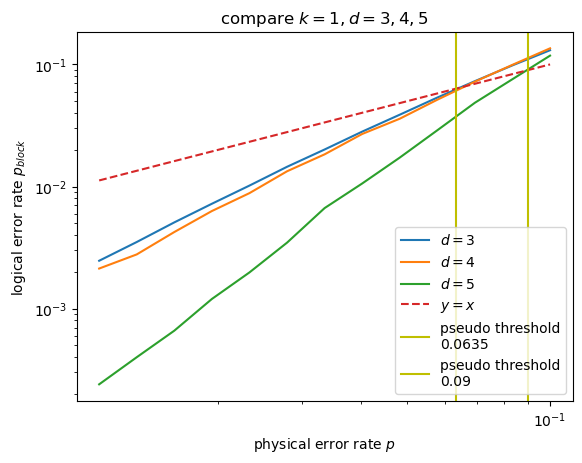

In [43]:
plt.title('compare $k=1, d=3,4,5$')
plt.yscale('log'),plt.xscale('log')

data = json.load(open('result/n7k1d3-x3z3dx3dz3-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='$d=3$')

data = json.load(open('result/n15k1d4-x8z6dx4dz4-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='$d=4$')

data = json.load(open('result/n25k1d5-x13z11dx5dz5-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='$d=5$')

h = np.array(p_qubit)
plt.plot(h, h, '--',label='$y=x$')


p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))
p_threshold=0.09
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

- distance 5 looks okay
- d=3 and d=4 need better data


## Check $k=2, d=3,4,5$

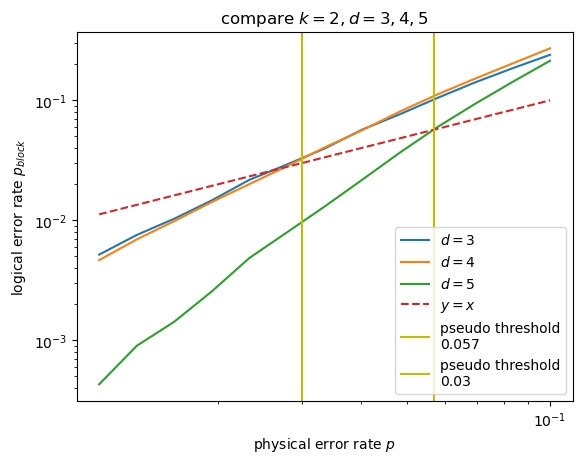

In [44]:
plt.title('compare $k=2,d=3,4,5$')
plt.yscale('log'),plt.xscale('log')

data = json.load(open('result/n11k2d3-x4z5dx3dz3-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='$d=3$')

data = json.load(open('result/n18k2d4-x8z8dx4dz4-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='$d=4$')

data = json.load(open('result/n27k2d5-x13z12dx5dz5-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='$d=5$')

h = np.array(p_qubit)
plt.plot(h, h, '--',label='$y=x$')


p_threshold=0.057
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))
p_threshold=0.03
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

- interesting that `d=4` has slightly worse pseudo threshold and larger logical error rate
- why? because code is larger?

# Threshold simulation for Subsystem Product Codes

## Product of Steane codes

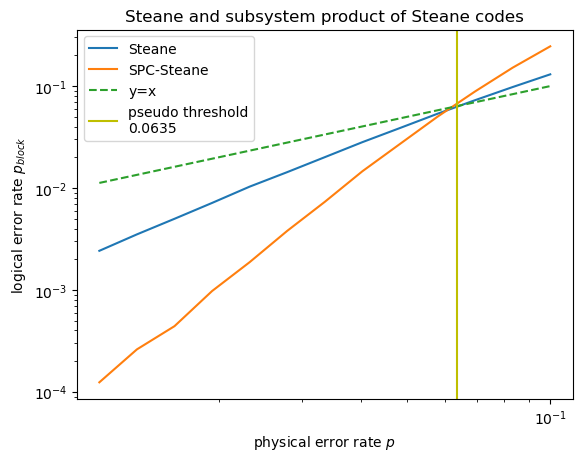

In [66]:
# Figure 1: Steane and subsystem product of Steane codes
plt.title('Steane and subsystem product of Steane codes')
plt.yscale('log'),plt.xscale('log')

data = json.load(open('result/steane.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='Steane')

data = json.load(open('result/spc-steane.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='SPC-Steane')

h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='y=x^3')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

# TODO: what is next?
- [ ] show larger k?
- [ ] implement ReShape decoder
  - how do you know it is good or not? what to compare?
- [ ] result of toric code? pymatching?
  - compare threshold, as well as speed


# Appendix
### sample plot use `matplotlib`

In [ ]:

weight = [45.8,47.6,52.1,53.5,54.4,56.7,57.1,58.0]
weight = [145.8,147.6,152.1,153.5,154.4,156.7,157.1,158.0]
height = [156.7,158.7, 159.7,162.5,162.5,163,163,163.3]

plt.plot(height,weight)
plt.title("weight versus height for teenage girls, 13-20 years")
plt.xlabel("height $(cm)$")
plt.ylabel("weight $(kg)$")

# plot a function

h = np.arange(157., 163., .1)
w = 1.9 * h -153
# red dashes, blue squares and green triangles
plt.plot(h, w, 'r--')

# this is a mimic of linear regression/linear fit